#Author:kailash pantha
#Date: 2023-6-27
@copyright

This is an example code for classification of handwritten digit os MNIST data set using tensorflow, numpy and matplotlib.

In [35]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
%matplotlib inline


In [36]:
from tensorflow.keras.datasets import mnist

In [37]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

Checking the shape of the training and test dataset after loading the data

In [38]:
print(f'x_train shape',xtrain.shape)
print(f'y_train shape',ytrain.shape)
print(f'x_test shape',xtest.shape)
print(f'y_test shape',ytest.shape)

x_train shape (60000, 28, 28)
y_train shape (60000,)
x_test shape (10000, 28, 28)
y_test shape (10000,)


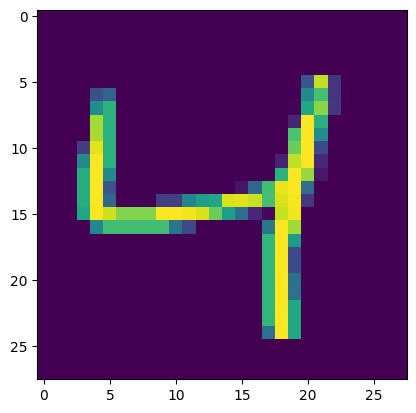

In [39]:
plt.imshow(xtrain[2])

In [40]:
(ytrain[2])

4

here output is in the form of integer so we need to convet it into binary form


set() method is used to convert any of the iterable to sequence of iterable elements with distinct elements, commonly called Set.

In [41]:
set(ytrain)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

to_categorical function. Converts a class vector (integers) to binary class matrix

In [42]:
y_train_enc=to_categorical(ytrain)
y_test_enc=to_categorical(ytest)
print(f'ytrain enc ex {y_train_enc[5]} for ytrain: {ytrain[5]}')
print(f'ytest enc ex {y_test_enc[5]} for ytest: {ytrain[5]}')

ytrain enc ex [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] for ytrain: 2
ytest enc ex [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] for ytest: 2


now Flattening the given 28*28 grayscale image to vector

In [43]:
x_train_reshape= np.reshape(xtrain,(60000,784))
x_test_reshape= np.reshape(xtest,(10000,784))


In [44]:
x_train_reshape.shape

(60000, 784)

In [45]:
print(set(x_train_reshape[5]))

{0, 3, 4, 5, 6, 7, 10, 13, 14, 15, 16, 17, 18, 21, 22, 23, 25, 26, 29, 30, 31, 33, 35, 36, 37, 40, 49, 53, 54, 58, 59, 60, 65, 66, 72, 73, 77, 78, 87, 88, 89, 93, 96, 100, 105, 106, 110, 116, 117, 121, 122, 124, 125, 126, 128, 129, 135, 136, 143, 146, 151, 152, 157, 163, 167, 170, 173, 178, 179, 180, 181, 184, 194, 200, 202, 203, 205, 207, 208, 211, 216, 217, 220, 223, 224, 227, 228, 231, 232, 239, 241, 242, 243, 244, 245, 247, 252, 253, 255}


Normalizing the pixel values

In [46]:
x_mean=np.mean(x_train_reshape)
x_std=np.std(x_train_reshape)

x_train_norm=(x_train_reshape-x_mean)/(x_std)
x_test_norm=(x_test_reshape-x_mean)/(x_std)

In [47]:
print(set(x_train_norm[5]))

{0.8487171801499638, 1.1287312165491004, 1.497840628166144, 2.223331540654816, 2.783359613453089, 1.4342010744390676, 2.681536327489767, 2.7960875241985046, 2.261515272891062, 2.337882737363554, 1.8542221290377725, 2.821543345689335, 2.6560805059989363, 1.2178265917670075, 2.18514780841857, 1.0523637520766087, -0.10587612575618353, 1.879677950528603, 2.0451407902190017, 2.516073487799368, 0.03413089244338476, -0.19497150097409063, -0.2458831439557518, 1.574208092638636, 1.7396709323290347, 2.3760664695997997, 2.210603629909401, 0.08504253542504596, -0.05496448277452233, -0.424073894391566, -0.3349785191736589, 0.41596821480584373, -0.14405985799242943, 0.49233567927833555, -0.37316225140990483, 1.2941940562394993, -0.004052839792861136, 1.154187038039931, 2.426978112581461, 2.1215082546914936, 0.683254340459565, 1.6505755571111276, -0.23315523321033652, 0.04685880318880006, -0.09314821501076823, 1.1796428595307615, 2.6178967737626904, 1.5105685389115593, -0.042236572029107036, -0.38589

Creating model

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [49]:
model=Sequential(
    [
        Dense(units=128,activation='relu',input_shape=(784,)),
        Dense(units=128,activation='relu'),
        Dense(units=10,activation='softmax')

    ]
)

In [53]:
model.compile(
    optimizer='sgd',
    loss = 'categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [54]:
model.fit(x_train_norm, y_train_enc, epochs=4)

Epoch 1/4
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3692 - accuracy: 0.8920
Epoch 2/4
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1829 - accuracy: 0.9465
Epoch 3/4
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1404 - accuracy: 0.9591
Epoch 4/4
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1144 - accuracy: 0.9665


Evaluation of model

In [55]:
loss,accuracy=model.evaluate(x_test_norm, y_test_enc)

313/313 [==============================] - 0s 1ms/step - loss: 0.1195 - accuracy: 0.9629


In [62]:
preds=model.predict(x_test_norm)

313/313 [==============================] - 0s 1ms/step


In [63]:
preds.shape

(10000, 10)

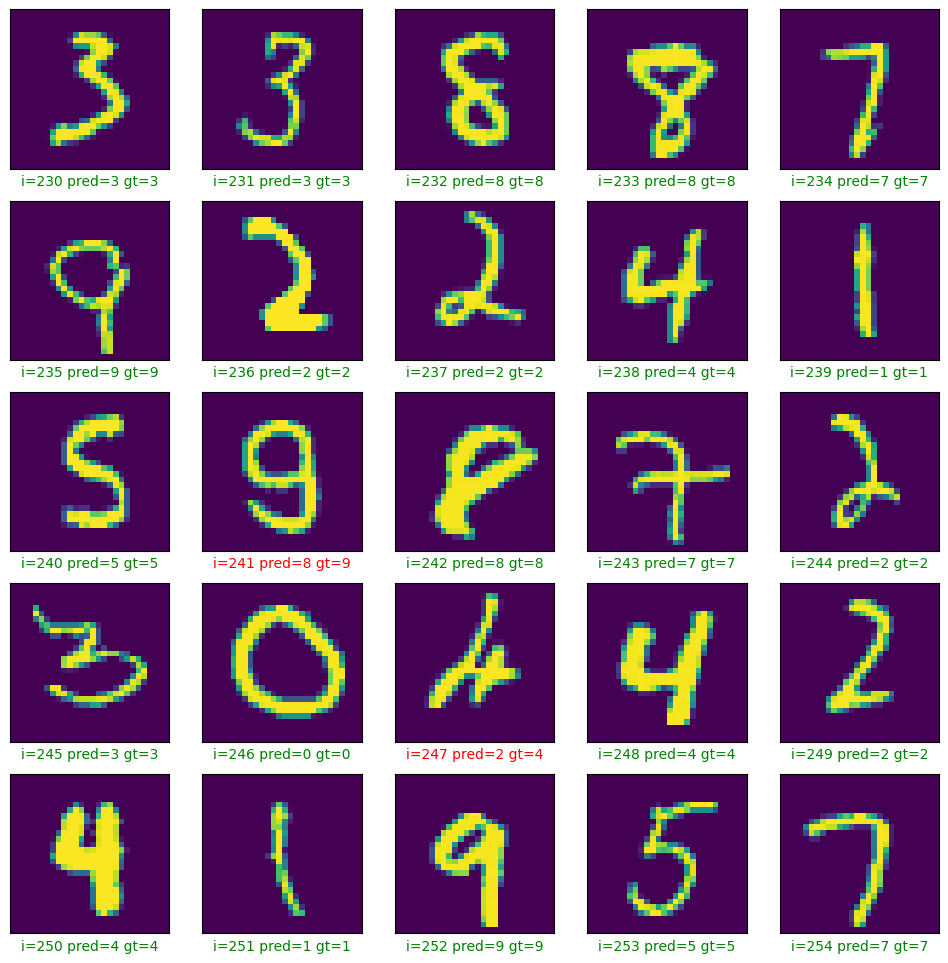

In [71]:
plt.figure(figsize=(12,12))

start_loc = 230
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  pred = np.argmax(preds[start_loc+i])
  gt = ytest[start_loc+i]

  color = 'green'
  if pred != gt:
    color = 'red'

  plt.xlabel(f'i={start_loc+i} pred={pred} gt={gt}', color=color)
  plt.imshow(xtest[start_loc+i])
plt.show()